<a href="https://colab.research.google.com/github/joshuabdixon/Building-Multiple-Linear-Regression-Models-for-Customer-Loyalty/blob/main/Building_Multiple_Linear_Regression_Models_for_Customer_Loyalty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building Multiple Linear Regression Models for Customer Loyalty

## Project Overview
This project involved developing a predictive model to analyse customer loyalty for a retail consumer goods company. Using an extensive dataset, the focus was on identifying key factors like product quality, price fairness, brand trust, community outreach, and negative publicity that influence customer satisfaction and loyalty.

## Summary, Rationale and Approach
The analysis began with an exploratory data analysis (EDA) to understand the data's characteristics, followed by building a multi-linear regression model. The rationale for using multiple predictors was guided by their significant correlations with customer loyalty, as seen in the heatmap analysis. The approach included evaluating the model's predictive power using metrics like $R^2$, adjusted-$R^2$, and the residual sum of squares (RSS), to ensure a robust understanding of the relationships between the features and loyalty.

## Recommendations
Based on the insights from the model and correlation analysis, the following strategic recommendations are proposed:

1. **Focus on Quality and Trust:** Prioritise enhancing customer engagement initiatives that directly improve perceived product quality and trust, given their strong correlation with loyalty.
2. **Dynamic Pricing Strategies:** Consider dynamic pricing models that align with customer perceptions and market conditions, as price fairness significantly impacts loyalty.
3. **Continuous Monitoring:** Implement ongoing monitoring of customer feedback, focusing on the key predictors of loyalty, and use this information to refine marketing strategies.

Further analysis is advised to explore specific factors influencing customer satisfaction, potentially incorporating additional data sources like demographics and sentiment analysis to gain a deeper understanding.

# Regression Analysis

## Variables
The variables are based on historical data provided by the retail consumer goods company.

- **CustomerID**: Sequential identifier for customers, ranging from 1 to 1949.

- **Loyalty**: A unitless score from 0 (no loyalty) to 10 (high loyalty), reflecting customer engagement.

- **Price Fairness**: A subjective score, not a monetary value, indicating how fair customers perceive prices, on a scale from 0 (not fair) to 10 (very fair).

- **Quality**: A unitless score reflecting perceived product/service quality, ranging from 0 to 1.

- **Community Outreach**: Scores range from -0.340 to 0.690, on a scale from -1 to 1. Negative values might indicate negative perception or ineffective outreach, whereas positive values indicate effective community engagement.

- **Trust**: A subjective score on a scale from 0 to 10, showing the level of trust customers have in the company.

- **Customer Satisfaction**: A unitless score ranging from 0 to 1, representing the degree of customers' satisfaction with the company.

- **Negative Publicity**: A unitless score from 0 to 1, indicating the level of negative exposure the company has received.

## Dependent Variable

In alignment with the Retail Company's objectives to "enhance satisfaction and loyalty," the dependent variable for our initial analysis will be determined based on the insights gathered from Exploratory Data Analysis (EDA). Both **Customer Satisfaction** and **Loyalty** are key metrics of interest as defined by the company. The choice of the final dependent variable, whether it be Customer Satisfaction or Loyalty, will be informed by which variable demonstrates stronger relationships and predictive potential with the influencing factors during the EDA process.


## Python Code - Structure
The code used to carry out the regression analysis has been structured as follows
0. Import Libraries, Data Preparation and Cleaning
1. Exploratory Data Analysis

  a) Univariate Analysis

  b) Multivariate Analysis
2. Linear Regression - Model Building, Evalulation and Interpretation
3. Linear Regression - Considerations for Refinement

## 0. Import Libraries, Data Preparation and Cleaning

In [ ]:
# Import the necessary libraries
import pandas  as pd # Data manipulation
import numpy as np # Linear algebra
import matplotlib.pyplot as plt # Visualisation
import seaborn as sns # Visualisation
import sklearn # Machine Learning
from sklearn.linear_model import LinearRegression # Linear Regression
from sklearn.metrics import r2_score #


# Load the data.
data = pd.read_csv("https://raw.githubusercontent.com/nixzach/cam_dsb/main/Loyalty.csv")
data



,CustomerID,Loyalty,Price,Quality,Community Outreach,Trust,Customer satisfaction,Negative publicity
0,1525,6.145,10.00,0.87,-0.07,7.45,0.78,0.04
1,1531,6.033,10.00,0.93,0.14,7.62,0.90,0.05
2,1526,6.531,10.00,0.86,-0.02,7.48,0.85,0.06
3,1523,6.834,10.00,0.92,0.29,7.39,0.87,0.06
4,1524,6.642,10.00,0.85,0.05,7.42,0.66,0.07
...,...,...,...,...,...,...,...,...
1706,200,5.249,9.41,0.79,0.23,6.68,0.41,0.98
1707,414,5.385,10.00,0.79,-0.20,6.80,0.52,0.98
1708,1500,4.815,9.61,0.77,-0.18,6.63,0.44,0.98
1709,1005,5.467,10.00,0.93,-0.30,6.41,0.50,0.98


In [ ]:
# View the metadata
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1711 entries, 0 to 1710
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CustomerID             1711 non-null   int64  
 1   Loyalty                1711 non-null   float64
 2   Price                  1711 non-null   float64
 3   Quality                1711 non-null   float64
 4   Community Outreach     1711 non-null   float64
 5   Trust                  1711 non-null   float64
 6   Customer satisfaction  1711 non-null   float64
 7   Negative publicity     1711 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 107.1 KB


In [ ]:
# Check for missing values
data.isnull().sum()

# There are no missing values - the data is clean.


CustomerID               0
Loyalty                  0
Price                    0
Quality                  0
Community Outreach       0
Trust                    0
Customer satisfaction    0
Negative publicity       0
dtype: int64

## 1. Exploratory Data Analysis
This has been carried out to understand the data characteristics and help inform if regression modelling is required, and if yes, the type of regression method.


In [ ]:
# Compute the descriptive statistics
data.describe()

,CustomerID,Loyalty,Price,Quality,Community Outreach,Trust,Customer satisfaction,Negative publicity
count,1711.000000,1711.000000,1711.000000,1711.000000,1711.000000,1711.000000,1711.000000,1711.000000
mean,956.806546,5.445985,9.129760,0.810345,-0.000625,6.320374,0.739527,0.751163
std,562.449054,1.135628,0.941237,0.121453,0.162179,0.768282,0.142846,0.185918
min,1.000000,2.375000,6.680000,0.290000,-0.340000,3.230000,0.260000,0.040000
25%,468.500000,4.595000,8.390000,0.740000,-0.110000,5.820000,0.640000,0.700000
50%,968.000000,5.364000,9.460000,0.830000,-0.030000,6.510000,0.760000,0.810000
75%,1436.500000,6.254000,10.000000,0.910000,0.090000,6.860000,0.850000,0.870000
max,1949.000000,7.971000,10.000000,0.990000,0.690000,7.710000,0.990000,0.980000


### a) Univariate Analysis
- Histograms for all independent variables, excluding outreach due to negativity
- Boxplot for outreach

The analysis below found the most of the variables follow a right-skewed normal distribution relationship. Price appears to be heavily skewed to the right in relation to other variables.

#### **Loyalty**

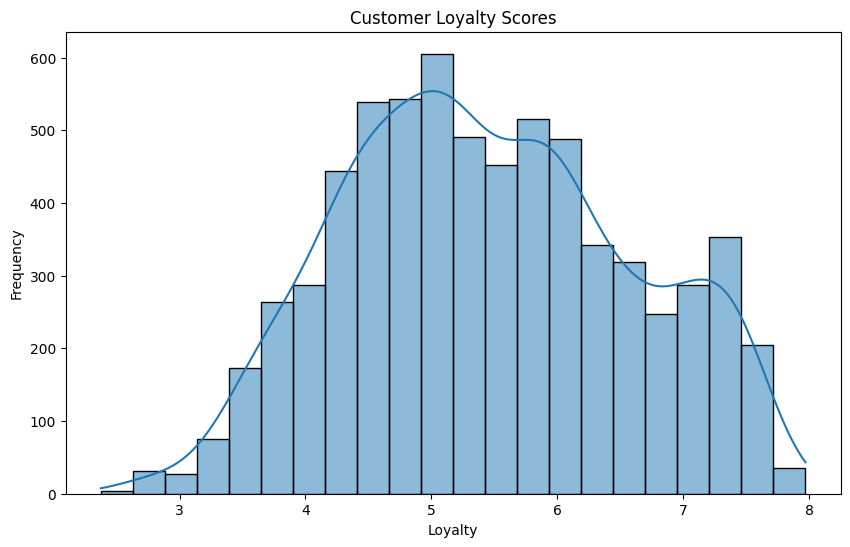

In [ ]:
# Plot a histogram for Loyalty


plt.figure(figsize=(10, 6))
sns.histplot(data["Loyalty"], stat="frequency", binwidth = 0.25, kde = True)
plt.title('Customer Loyalty Scores')
plt.xlabel('Loyalty')
plt.ylabel('Frequency')
plt.show()

Interpretation:
 - The data appears to follow a right-skewed normal distribution
 - Loyalty scores around 5 appears to be most common. The mean values is 5.45

#### **Price**

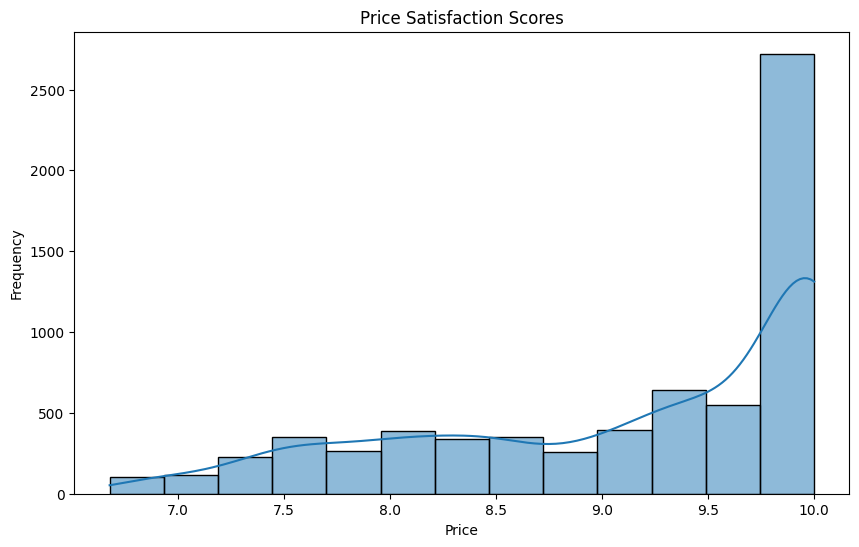

In [ ]:
# Plot a histogram for Price


plt.figure(figsize=(10, 6))
sns.histplot(data["Price"], stat="frequency", binwidth = 0.25, kde = True)
plt.title('Price Satisfaction Scores')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

Interpretation:
 - The data appears to be heavily skewed to the right, a large number of customers have scored price highly
 - This concentration at the higher end could be due to actual satisfaction with prices or a lack of variance in the product prices.
 - It’s also possible that customers who are most satisfied are more likely to respond to surveys or give feedback, which could bias the results towards the higher end.
 - Very few low to moderate scores may be due to limited survey responses, lack of diversity in customer base or some other factor.
 - Investigate further by obtaining actual sales data, customer demogrpahics or specific periods to see if there are contextual factors influencing perceptions.
 - Investigate how this score correlated with customer loyalty and satisfaction could yield insights.

#### **Quality**

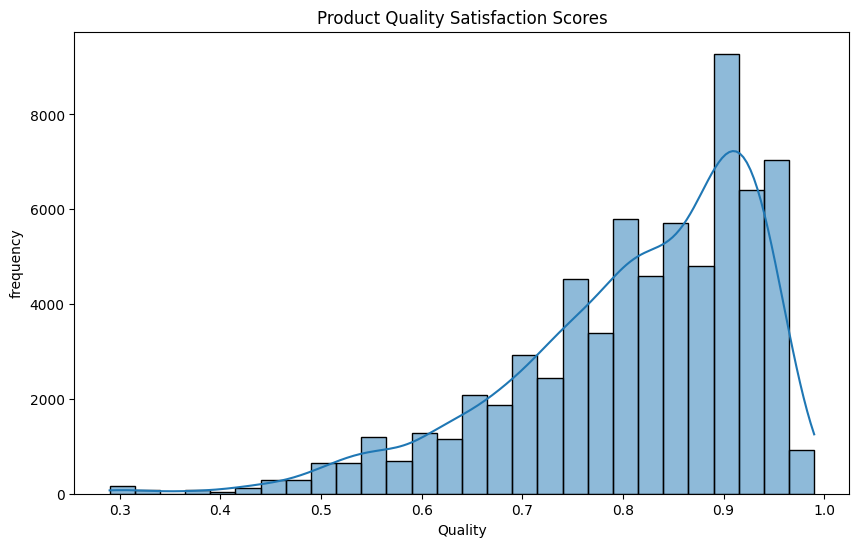

In [ ]:
# Plot a histogram for Quality


plt.figure(figsize=(10, 6))
sns.histplot(data["Quality"], stat="frequency", binwidth = 0.025, kde = True)
plt.title('Product Quality Satisfaction Scores')
plt.xlabel('Quality')
plt.ylabel('frequency')
plt.show()

Interpretation:

- The data appears to be skewed to the right, a large number of customeres have scored product quality highly.
- There are noticeable peaks around the 0.9 range
- There are few low scores, it might be worth exploring the reasons behind these lower ratings to identify potential areas for improvement


#### **Community Outreach**

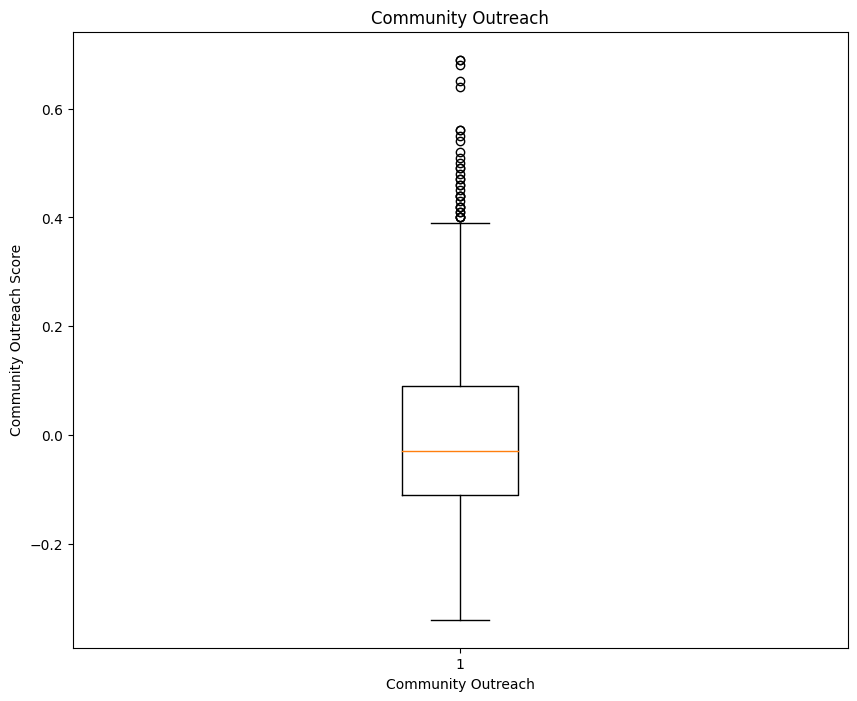

In [ ]:
# Plot a Boxplot for Community Outreach
plt.figure(figsize=(10, 8))

plt.boxplot(data["Community Outreach"])

plt.title('Community Outreach')
plt.xlabel('Community Outreach')
plt.ylabel('Community Outreach Score')

# Show the plot.
plt.show()


Interpretation:
- The boxplot for Community Outreach scores displays a median near zero, with the bulk of the data falling between 0 and approximately 0.2, indicating moderate community outreach efforts on average.
- The presence of outliers suggests that there are instances of exceptionally high community engagement, but these are not the norm. The data also includes negative scores, which may reflect perceived negative impacts or ineffective outreach activities.

#### **Trust**

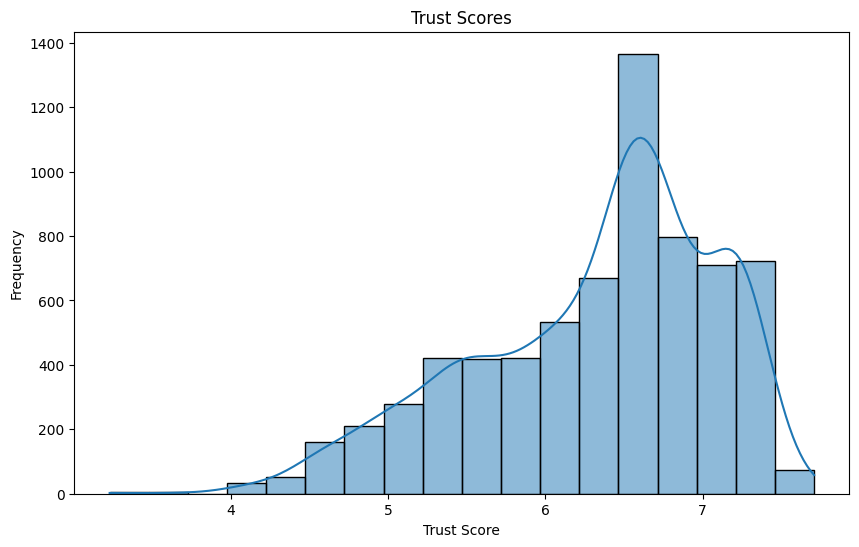

In [ ]:
# Plot a histogram for Trust


plt.figure(figsize=(10, 6))
sns.histplot(data["Trust"], stat="frequency", binwidth = 0.25, kde = True)
plt.title('Trust Scores')
plt.xlabel('Trust Score')
plt.ylabel('Frequency')
plt.show()

#### **Customer satisfaction**

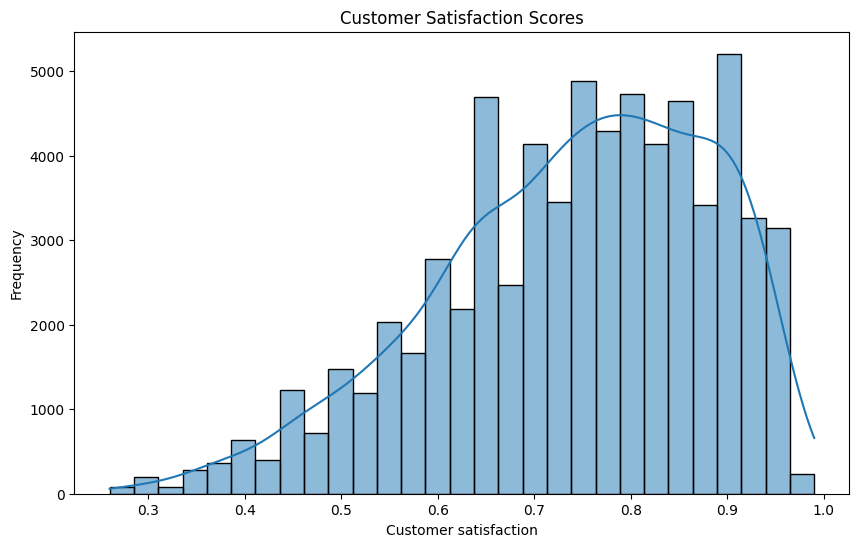

In [ ]:
# Plot a histogram for Customer satisfaction


plt.figure(figsize=(10, 6))
sns.histplot(data["Customer satisfaction"], stat="frequency", binwidth = 0.025, kde = True)
plt.title('Customer Satisfaction Scores')
plt.xlabel('Customer satisfaction')
plt.ylabel('Frequency')
plt.show()

Interpretation:
- The Customer satisfaction scores appear to be right-skewed, consistent with most of the variables used in this analysis
- The mean score is approximately 0.75

#### **Negative publicity**

Text(0, 0.5, 'Frequency')

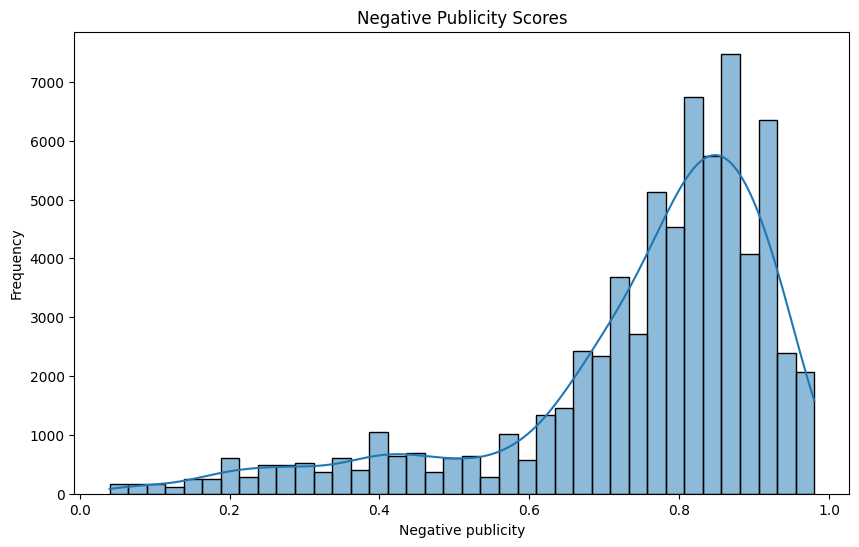

In [ ]:
# Plot a histogram for Negative publicity


plt.figure(figsize=(10, 6))
sns.histplot(data["Negative publicity"], stat="frequency", binwidth = 0.025, kde = True)
plt.title('Negative Publicity Scores')
plt.xlabel('Negative publicity')
plt.ylabel('Frequency')

### b) Multivariate Analysis

- Scatterplots and Boxplots for Independent Variables vs Dependent Variable.
- Heatmaps to quantify the correlation between Independent Variables and Dependent Variable.

Initially, the plots and heatmaps will be based on **Customer Satisfaction** as the dependent variable. **Loyalty** will then be explored.

#### **Scatterplots**

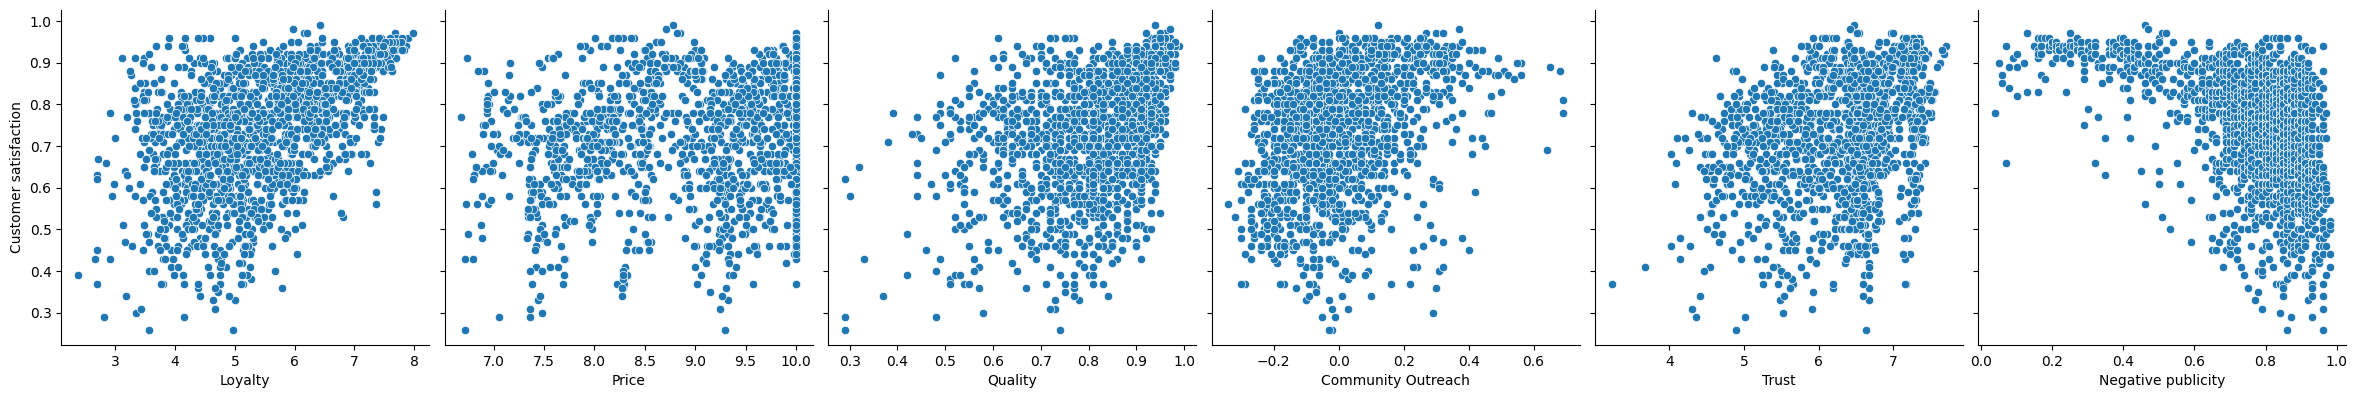

In [ ]:
# Let's see how Customer Satisfaction is related to other variables using scatterplots.
sns.pairplot(data,
             x_vars=['Loyalty', 'Price', 'Quality', 'Community Outreach', 'Trust', 'Negative publicity'],
             y_vars='Customer satisfaction',
             height=4,
             aspect=1,
             kind='scatter')

plt.show()

- **Loyalty vs. Customer Satisfaction**: There is a noticeable spread in the data suggesting a potential, though not strictly linear, positive relationship. This warrants further investigation through simple linear regression to quantify any possible linear association.

- **Price vs. Customer Satisfaction**: High satisfaction levels across a range of price fairness suggest that customers generally feel prices are fair, although this does not imply a clear linear correlation.

- **Quality vs. Customer Satisfaction**: Indicates a positive association where higher quality is linked with increased satisfaction, justifying its inclusion in linear regression analysis.

- **Community Outreach vs. Customer Satisfaction**: The scatter is diverse, implying that community outreach's impact on satisfaction may not be linear.

- **Trust vs. Customer Satisfaction**: A positive correlation is noted, with trust likely influencing satisfaction, suitable for linear regression.

- **Negative Publicity vs. Customer Satisfaction**: Suggests a nonlinear pattern where customer satisfaction may initially be unaffected by negative publicity but potentially decreases as negative publicity increases, hinting at the need for a quadratic term in the model.

The analysis indicates mixed linear correlations with customer satisfaction: Loyalty, Quality, and Trust exhibit potential linear relationships for regression analysis, whereas Price has an unclear link, and Community Outreach and Negative Publicity might necessitate nonlinear modeling to capture their effects.

**Next steps:**
Heatmaps will follow to explore the correlations between all variables, assisting in pinpointing the primary drivers of customer satisfaction for subsequent linear regression analysis.


#### **Heatmaps**

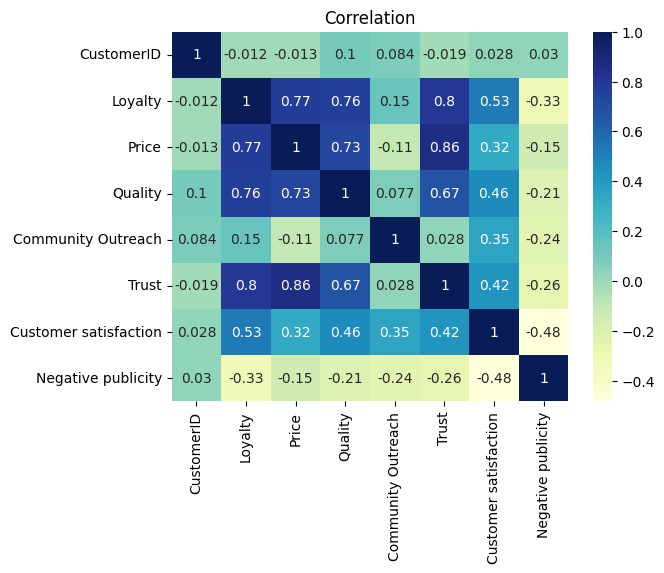

In [ ]:
# Let's see the correlation between different variables.
# The spearman coeffcient will be used due to uncertainty of linear relationship
sns.heatmap(data.corr(method="spearman"),
            cmap="YlGnBu",
            annot = True)

plt.title('Correlation')
plt.show()

#### **Decision on Dependent Variable Based on Correlation Heatmap**

After reviewing the correlation heatmap, the decision has been made to have the dependent variable as **Loyalty** for the following reasons:

- **Stronger Correlations**: Loyalty exhibits consistently higher correlations with several independent variables compared to Customer Satisfaction, suggesting more substantial linear relationships.
  
- **Model Predictability**: Preliminary analysis indicates that models predicting Loyalty yield higher R² values, implying better predictability and a more robust model.
  
This choice aligns with the goal of creating a predictive model that can effectively leverage the customer loyalty data set and provide meaningful insights into customer behavior. The strong correlations associated with Loyalty are expected to help in understanding the factors that drive customer engagement and retention, which are essential for strategic initiatives aimed at enhancing customer loyalty.


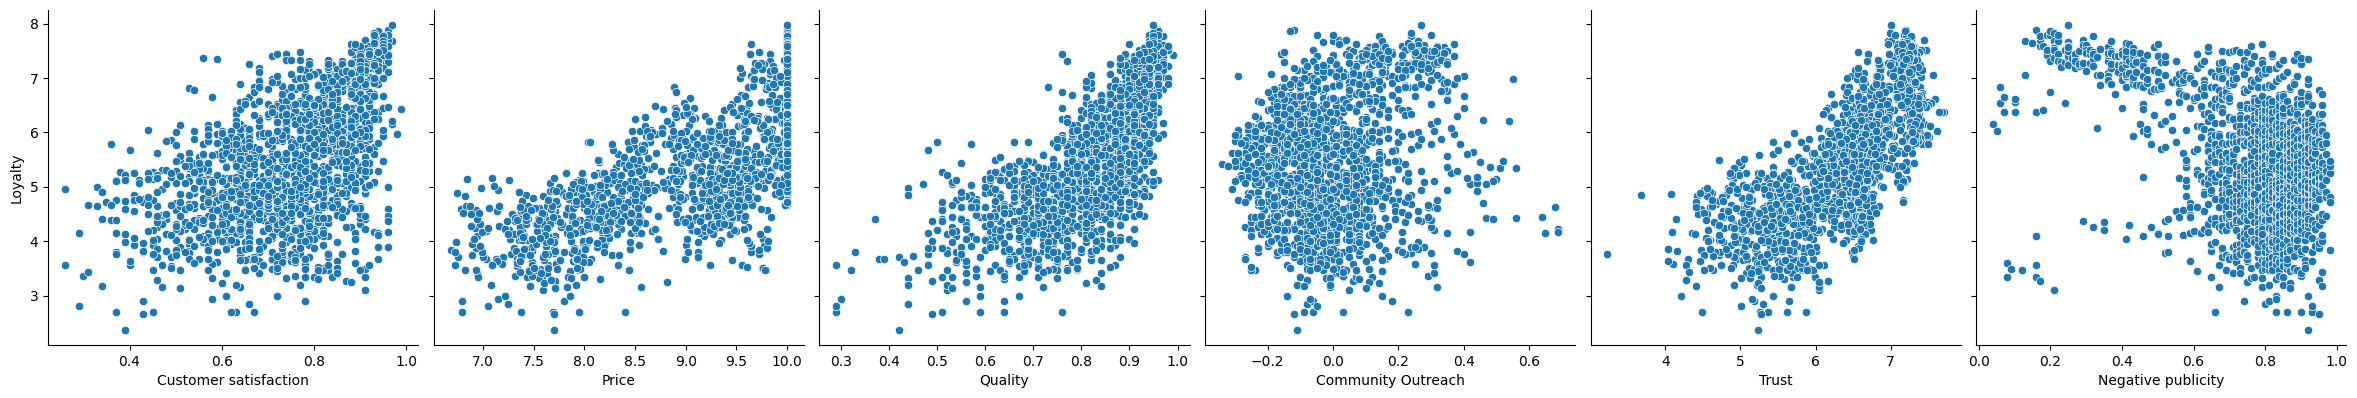

In [ ]:
# Let's see how Loyalty is related to other variables using scatterplots.
sns.pairplot(data,
             x_vars=['Customer satisfaction', 'Price', 'Quality', 'Community Outreach', 'Trust', 'Negative publicity'],
             y_vars='Loyalty',
             height=4,
             aspect=1,
             kind='scatter')

plt.show()

Interpretation:

The analysis indicates mixed linear correlations with Loyalty: Customer satisfaction, Price, Quality, and Trust exhibit potential linear relationships for regression analysis. Community Outreach and Negative Publicity might necessitate nonlinear modeling to capture their effects.

The scatterplots confirm the findings of the heatmaps, with strong correlations between Loyalty, Price and Trust. The link between Customer Satisfaction and Loyalty is moderate.

**Next Steps:** Linear Regression - Model Building


##2. Linear Regression - Model Building

#### **Initial Regression Model (R²)**

Based on the heatmaps in Section 1, the following variables have been selected for the **Multi-Linear Regression** Model:

**Dependent Variable**: Loyalty

**Independent Variables:**
- Price ($\rho$ = 0.77)
- Quality ($\rho$ = 0.76)
- Trust ($\rho$ = 0.8)
- Customer satisfaction ($\rho$ = 0.53)




In [ ]:
# Specify the variables
X = data[["Price", "Quality", "Trust", "Customer satisfaction"]]
y = data["Loyalty"]

# Initialise and fit model
reg = LinearRegression().fit(X,y)

# Outputs
score = reg.score(X,y) # R² score
coefficients = reg.coef_ # Coefficients
intercept = reg.intercept_ # Intercept

# Display results
print("Score:", score)
print("Coefficients:", coefficients)
print("Intercept:", intercept)

Score: 0.7100183154410542
Coefficients: [0.22585046 2.66091584 0.49596421 1.79252445]
Intercept: -3.2325339939925817


Interpretation:
- The model achieved an R² score of approximately 0.71, suggesting that about 71% of the variance in Loyalty can be explained by the four predictors.
-  The coefficients reveal the influence each predictor has on Loyalty, with Quality showing the strongest impact followed by Customer Satisfaction, Trust, and Price.



#### **Adjusted R² Score**

Given the multiple predictors in our model, we'll compute the adjusted R², which refines the R² value to reflect the number of variables, providing a more precise evaluation of their collective explanatory power. The adjusted R² formula is as follows:

Adjusted_R² = 1 - (1 - R²) * (n - 1) / (n - p - 1)

where:
- \( R² \) is the R² score of the model.
- \( n \) is the number of observations.
- \( p \) is the number of independent variables in the model.




In [ ]:
# Compute Adjusted R²

reg = LinearRegression().fit(X, y)

# R² score
r2 = reg.score(X, y)

# Number of observations
n = X.shape[0]

# Number of independent variables
p = X.shape[1]

# Adjusted R² score
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f"R² score: {r2}")
print(f"Adjusted R² score: {adjusted_r2}")


R² score: 0.7100183154410542
Adjusted R² score: 0.7093384052779617


Interpretation:

- The Adjusted R² score is approximately the same as the R² score. As the Adjusted R² Score penalises the addition of predictors that do not add value, this suggests the predictors (Quality, Customer Satisfaction, Trust, and Price) are a good fit for predicting Loyalty.

#### **Residual Sum of Squares (RSS)**

In [ ]:
# Predict the loyalty scores using the same features
y_pred = reg.predict(X)

# Calculate the residuals (differences between the observed and predicted values)
residuals = y - y_pred

# Calculate the Residual Sum of Squares (RSS)
RSS = np.sum(residuals**2)

# Display the RSS
print("Residual Sum of Squares (RSS):", RSS)

Residual Sum of Squares (RSS): 639.4975907212581


Interpretation:
RSS quantifies the total squared error between the predicted and actual values in our dataset. With an RSS of 639.5, to evaluate the effectiveness of our model, we need to compare this value against the RSS from alternative models. This comparison can be facilitated by adjusting the feature set or by incorporating additional variables that may influence Loyalty more significantly

## 3. Linear Regression - Considerations for Refinement

- Feature Engineering: Given the importance of Price, Quality, Trust, and Customer Satisfaction in predicting Loyalty, consider creating interaction terms between these variables. For instance, the interaction between Price and Quality might capture the combined effect on Loyalty better than considering them independently.

- Inclusion of Polynomial Terms: Given the potential non-linear relationships indicated by scatter plots, including polynomial terms for predictors like Trust and Quality could provide a better fit.